Here we are going to get acquainted with an algorithm called KNN (k-nearest neighbors). Join us. Usually, there is an explanation related to that part at the bottom of each code.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def true_label (x,y):
    import numpy as np
    c=2*np.sin(x/y)+2*np.cos(x*y)+0.15
    if c>0.5:
        return True
    else:
        return False

def true_Vfunction (x,y):
    import numpy as np
    c=2*np.sin(x/y)+2*np.cos(x*y)+0.15
    return c

importing and dfinitons

We defined the function by which partitions the coordinate plane into two parts.

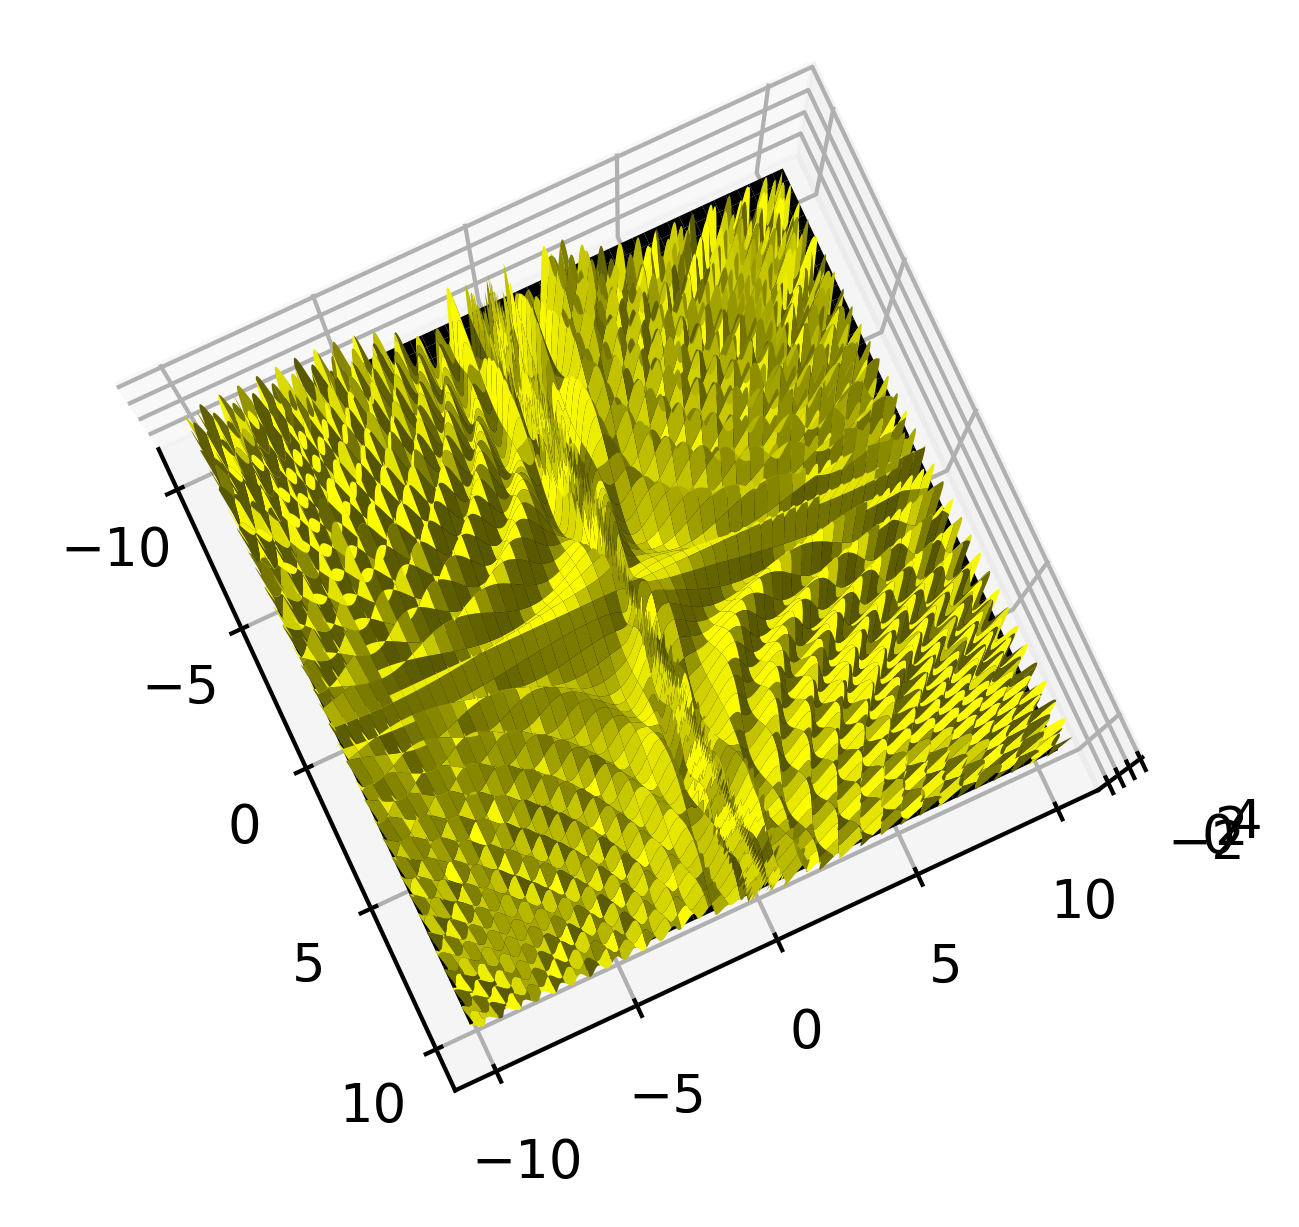

In [2]:
from mpl_toolkits import mplot3d
import numpy
from matplotlib import pyplot

Xfroshow=np.linspace(-10,10,500)
Yfroshow=np.linspace(-10,10,500)
Xfroshow2,Yfroshow2=np.meshgrid(Xfroshow,Yfroshow)
Zforshow=2*np.sin(Xfroshow2/Yfroshow2)+2*np.cos(Xfroshow2*Yfroshow2)+0.15


fig = plt.figure(dpi=380)
wf = plt.axes(projection ='3d')
#wf.plot_wireframe(Xfroshow2, Yfroshow2, Zforshow, color ='green')
wf.plot_surface(Xfroshow, Yfroshow2, 0*Zforshow+0.5,alpha=1,color='black')
wf.plot_surface(Xfroshow2, Yfroshow2, Zforshow,alpha=1,color ='yellow')

wf.view_init(85,-25)
#wf.view_init(90,90)
pyplot.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

The partition of the page is done with the help of the above surface.

In [3]:
rndx=20*np.random.rand(1980)-10
rndy=20*np.random.rand(1980)-10
zrnd=[]
for i in range (0,len(rndx)):
    if true_label(rndx[i],rndy[i])==True:
        zrnd.append(True)
    else:
        zrnd.append(False)
Rrndx=[]
Rrndy=[]
Brndx=[]
Brndy=[]
for i in range (0,len(rndx)):
    if zrnd[i]==True:
      Rrndx.append(rndx[i])
      Rrndy.append(rndy[i])
    else:
      Brndx.append(rndx[i])
      Brndy.append(rndy[i])

Get n random and classify them by true label.

In [4]:
N=1550

x=np.linspace(-10,10,N)
y=np.linspace(-10,10,N)
X,Y=np.meshgrid(x,y)
Z1=2*np.sin(X/Y)+2*np.cos(X*Y)+0.15
z=Z1

for i in range (0,np.shape(z)[0]):
  for j in range (0,np.shape(z)[1]):
    if (z[i][j]>0.5):
      z[i][j]=20
    else:
      z[i][j]=False

It is just for visualizing the partition of the plane to red and blue, and the next one is to visualize data and our true function.

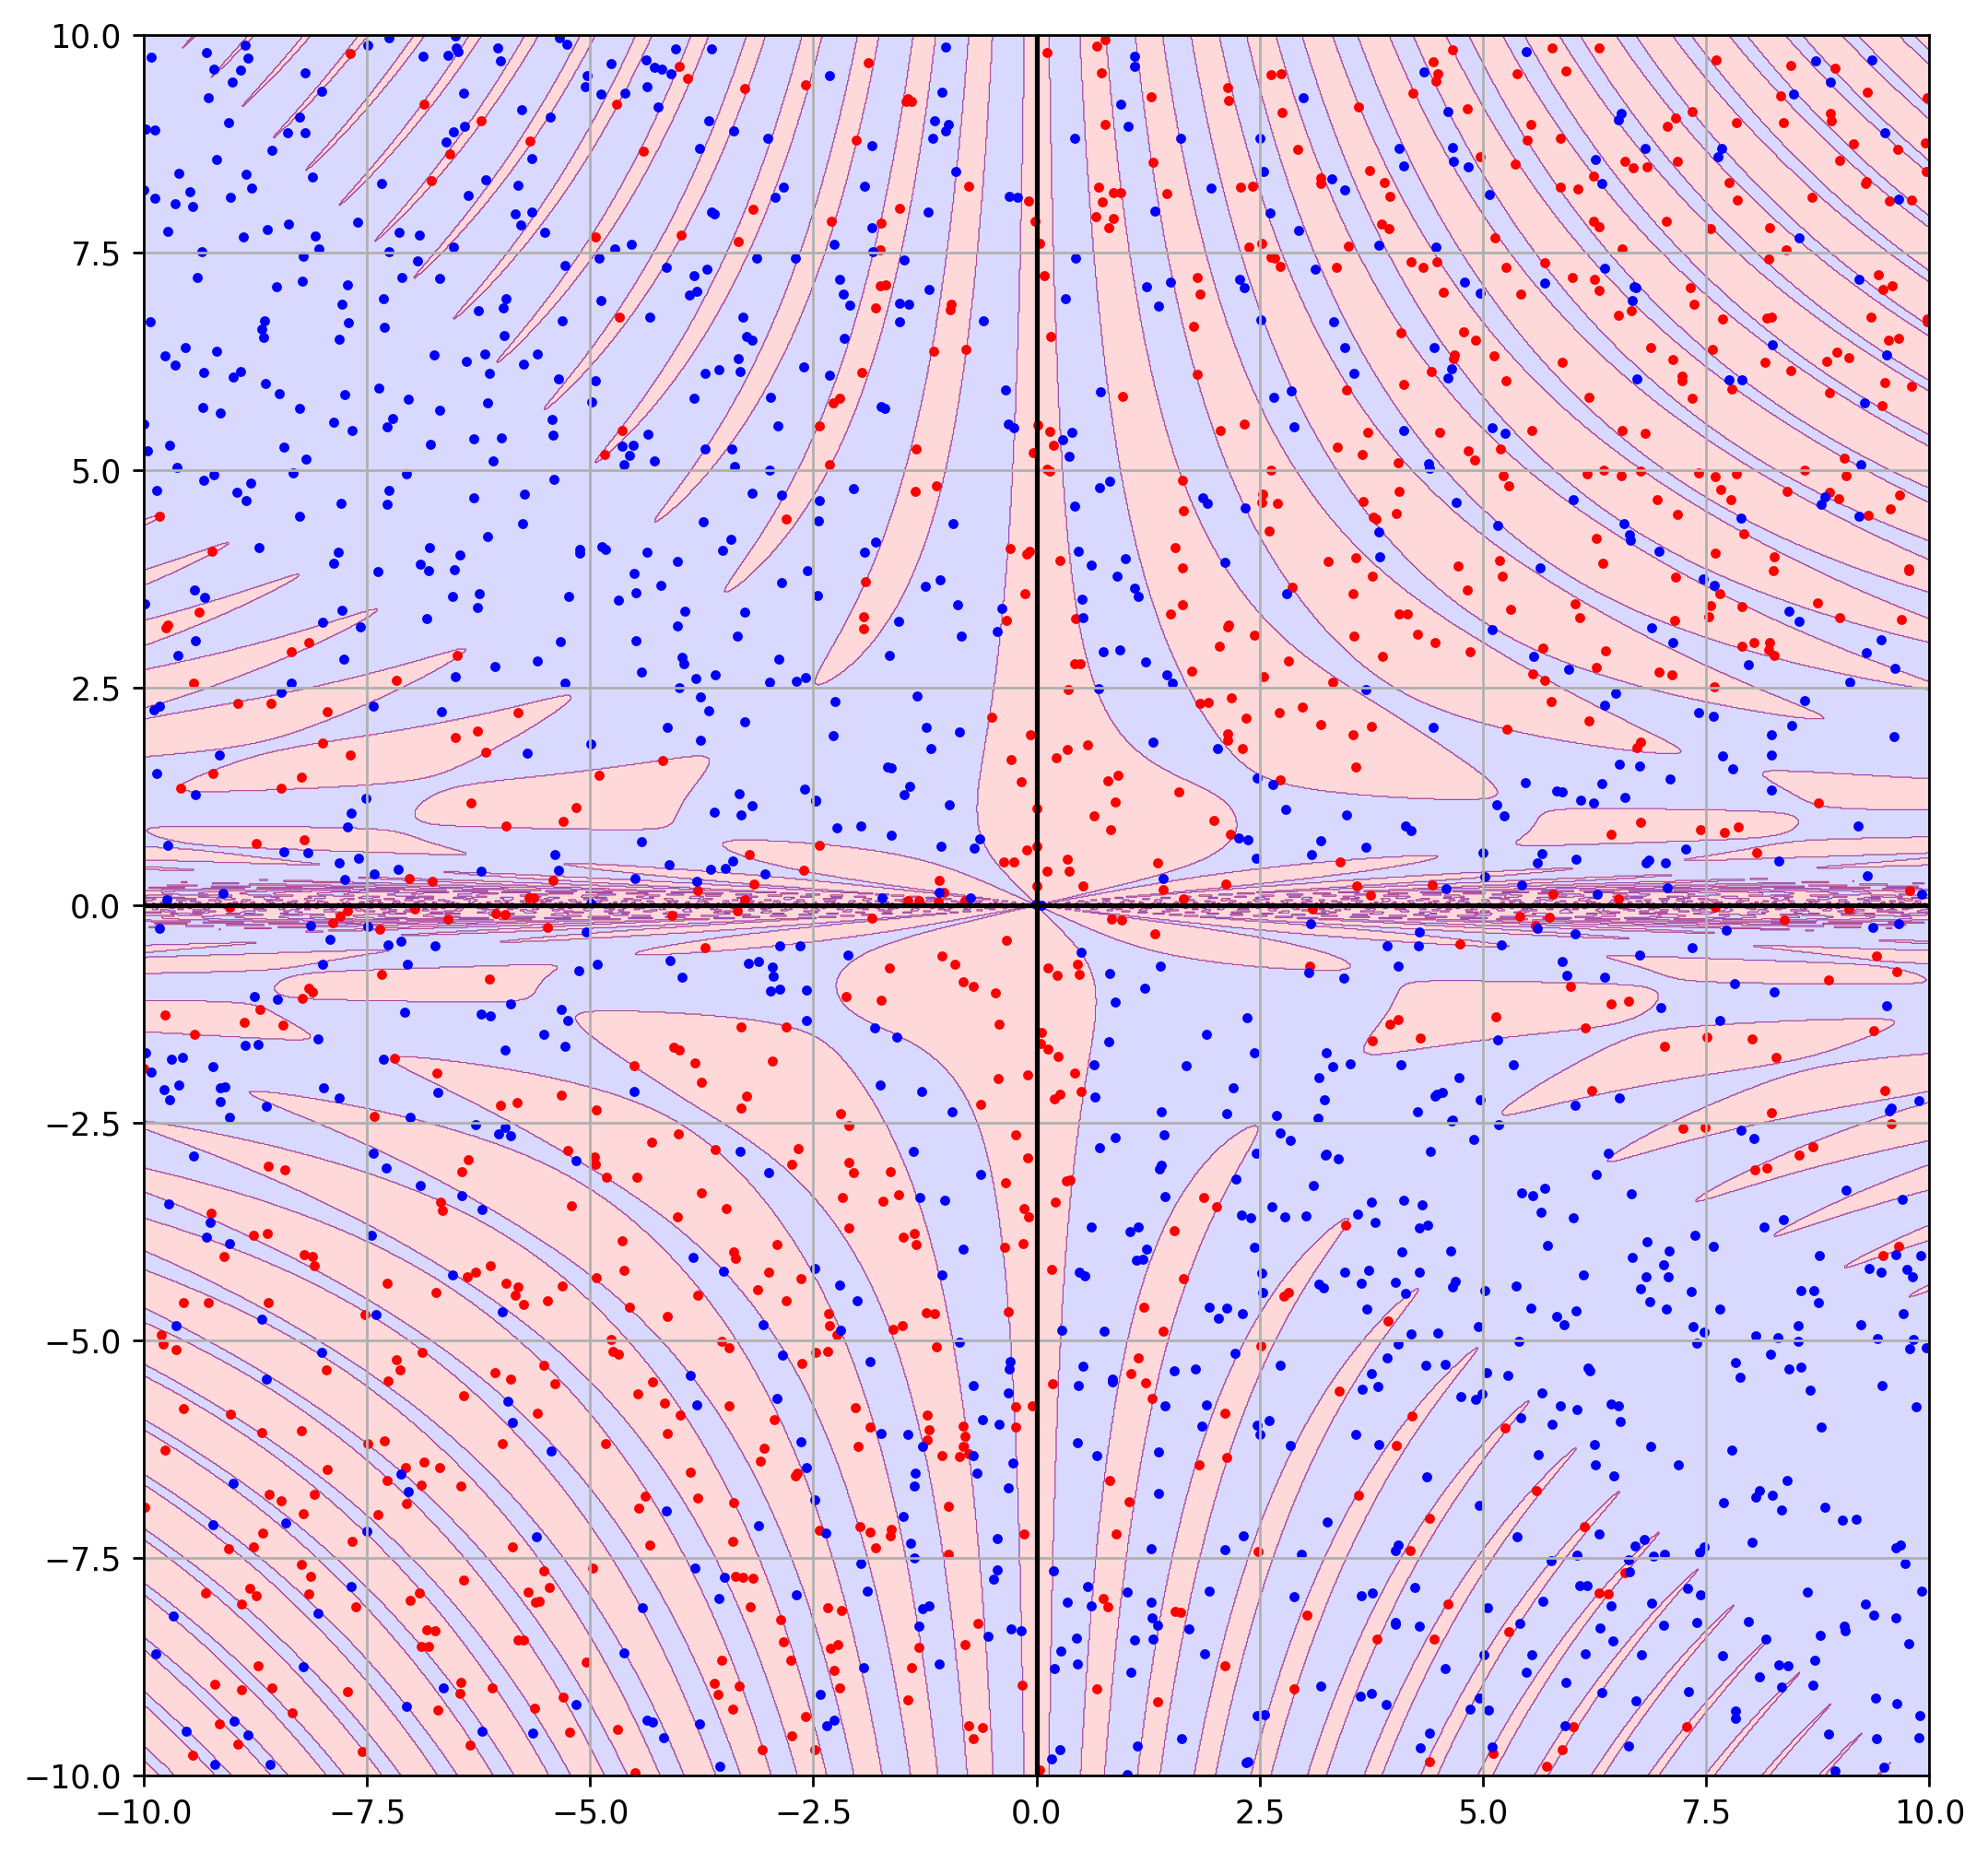

In [5]:
plt.figure(figsize=(10,10),dpi=250)
plt.contourf(x,y,z,colors=['blue','red'],alpha=0.15)
plt.scatter(Rrndx, Rrndy,color='red',s=4.5)
plt.scatter(Brndx, Brndy,color='blue',s=4.5)

#delta=0.01
#x_for_plot,y_for_plot=np.meshgrid(np.arange(-10,10,delta),np.arange(-10,10,delta))
#plt.contour(x_for_plot,y_for_plot,2*np.sin(x_for_plot/y_for_plot)+2*np.cos(x_for_plot*y_for_plot)+0.15,[0.5],alpha=1,linewidths=0.5)
plt.axhline(0,color='black') # x = 0
plt.axvline(0,color='black') # y = 0
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title('')
plt.show()

Here, we have a visualization of the true label and also the labels of data.

In [6]:
X=[]
for i in range (0,len(rndx)):
    X.append([rndx[i],rndy[i]])

#for i in range (0,len(zrnd))
#    if zrnd[i]==True
#        Y.aappend()

Modify the structure in order to use the algorithm

In [7]:
X_trian,X_test,y_trian,y_test=train_test_split(X,zrnd)

In this part, we divided the collection into two parts. The first part is for training and the second part is as a validation set. We will explain about the test set later.

In [8]:
KS=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range (1,300):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trian,y_trian)
    KS.append(knn.score(X_test,y_test))    

From hyperparameter 1 to 300, we apply the k-nearest neighbor algorithm to our data.

In [9]:
np.max(KS)

0.7171717171717171

To see the most accuracy we took.

In [10]:
KS.index(np.max(KS))

0

To see which hyperparameter got the most accuracy.

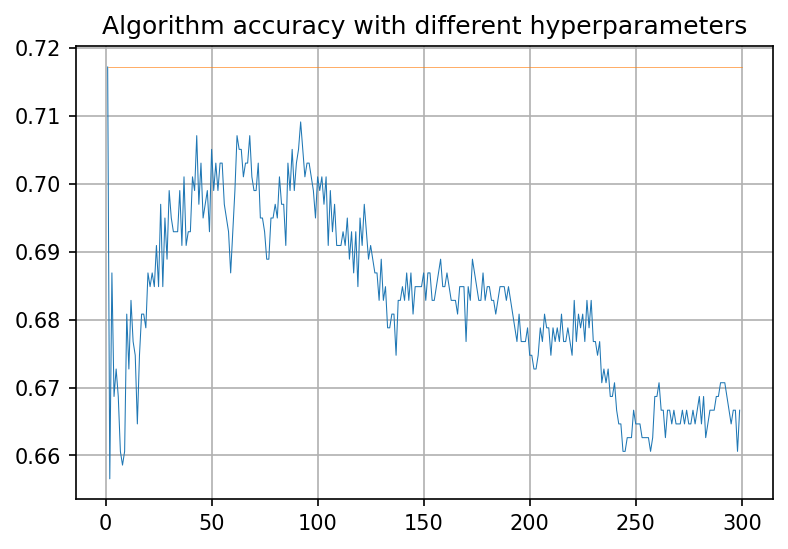

In [11]:
plt.figure(dpi=150)
plt.plot(np.arange(1,300,1),KS,lw=0.5)
plt.plot([1,300],[np.max(KS),np.max(KS)],lw=0.3)
plt.grid()
plt.title('Algorithm accuracy with different hyperparameters')
plt.show()

In [12]:
rndxtest=20*np.random.rand(1500)-10
rndytest=20*np.random.rand(1500)-10
zrndtest=[]
for i in range (0,len(rndxtest)):
    if true_label(rndxtest[i],rndytest[i])==True:
        zrndtest.append(True)
    else:
        zrndtest.append(False)
Rrndxtest=[]
Rrndytest=[]
Brndxtest=[]
Brndytest=[]
for i in range (0,len(rndxtest)):
    if zrndtest[i]==True:
      Rrndxtest.append(rndxtest[i])
      Rrndytest.append(rndytest[i])
    else:
      Brndxtest.append(rndxtest[i])
      Brndytest.append(rndytest[i])

        
Xtest=[]
for i in range (0,len(rndxtest)):
    Xtest.append([rndxtest[i],rndytest[i]])

Since we have the true labeling function, we can generate the test set randomly. So we do this for random data.

In [13]:
knn=KNeighborsClassifier(n_neighbors=KS.index(np.max(KS))+1)
knn.fit(X_trian,y_trian)
Euclidean_ac=knn.score(Xtest,zrndtest)
print(Euclidean_ac)

0.7213333333333334


We have already found the optimal hyperparameter for the validation set. Now we would like to check the accuracy of this hyperparameter on the test set.

In [14]:
KSTEST=[]
for i in range (1,300):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trian,y_trian)
    KSTEST.append(knn.score(Xtest,zrndtest))

We only do visualization on the test set as we did before on the validation set.

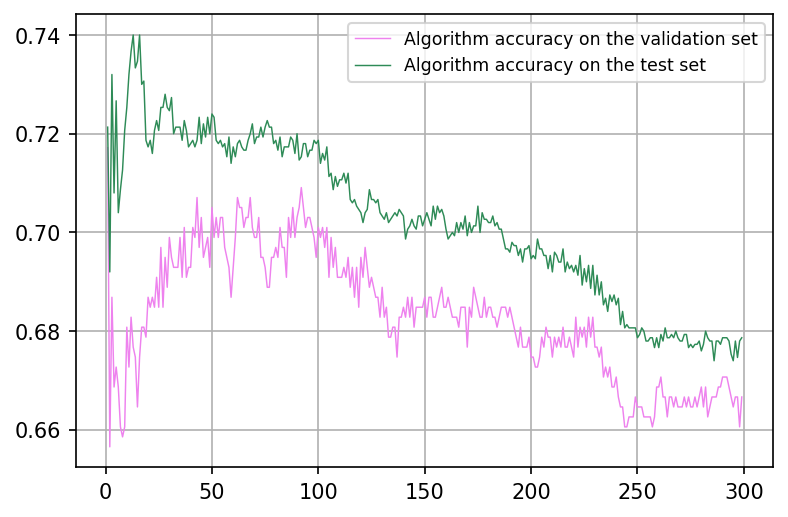

In [15]:
plt.figure(dpi=150)
plt.plot(np.arange(1,300,1),KS,lw=0.7,label='Algorithm accuracy on the validation set',color='violet')
plt.plot(np.arange(1,300,1),KSTEST,lw=0.7,label='Algorithm accuracy on the test set',color='seagreen')
#plt.plot([1,300],[np.max(KS),np.max(KS)],lw=0.3)
plt.grid()
plt.legend(fontsize='small')
plt.show()

Now we can see the accuracy of different hyperparameters on the validation set and the test set on a graph.

In [16]:
KS_manhattan=[]
for i in range (1,300):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_trian,y_trian)
    KS_manhattan.append(knn.score(X_test,y_test))  

We do the same operation with the Manhattan metric.

In [17]:
np.max(KS_manhattan)

0.7151515151515152

To see the most accuracy we took.

In [18]:
KS_manhattan.index(np.max(KS_manhattan))

0

To see which hyperparameter got the most accuracy.

In [19]:
knn=KNeighborsClassifier(n_neighbors=KS_manhattan.index(np.max(KS_manhattan))+1,metric='manhattan')
knn.fit(X_trian,y_trian)
Manhattan_ac=knn.score(Xtest,zrndtest)
print(Manhattan_ac)

0.72


We have already found the optimal hyperparameter for the validation set(Manhattan Distance). Now we would like to check the accuracy of this hyperparameter on the test set. 

In [20]:
KSTEST_M=[]
for i in range (1,300):
    knn=KNeighborsClassifier(n_neighbors=i,metric='manhattan')
    knn.fit(X_trian,y_trian)
    KSTEST_M.append(knn.score(Xtest,zrndtest))

We only do visualization on the test set as we did before on the validation set.

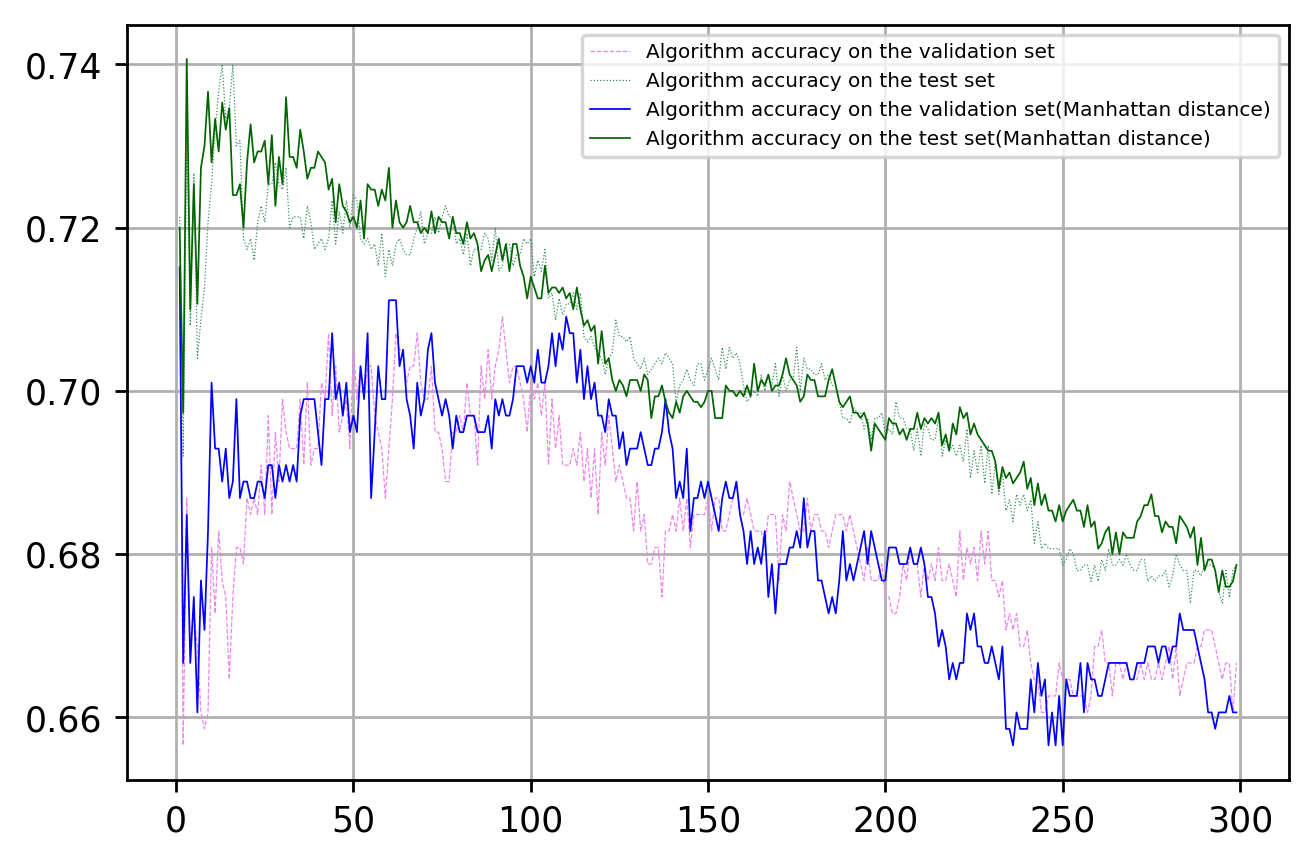

In [21]:
plt.figure(dpi=250)
plt.plot(np.arange(1,300,1),KS,lw=0.35,label='Algorithm accuracy on the validation set',color='violet',ls='--')
plt.plot(np.arange(1,300,1),KSTEST,lw=0.35,label='Algorithm accuracy on the test set',color='seagreen',ls=':')
plt.plot(np.arange(1,300,1),KS_manhattan,lw=0.5,color='blue',label='Algorithm accuracy on the validation set(Manhattan distance)')
plt.plot(np.arange(1,300,1),KSTEST_M,lw=0.5,label='Algorithm accuracy on the test set(Manhattan distance)',color='darkgreen')
#plt.plot([1,300],[np.max(KS),np.max(KS)],lw=0.3)
plt.grid()
plt.legend(fontsize='xx-small')
plt.show()

Now we can see the accuracy of different hyperparameters on the validation set and the test set on a graph. (according to manhatan distance and also euclidean Distance at the same time)

In [22]:
KS_cosine=[]
for i in range (1,300):
    knn = KNeighborsClassifier(n_neighbors=i, metric='cosine')
    knn.fit(X_trian,y_trian)
    KS_cosine.append(knn.score(X_test,y_test))

We do the same operation with the Cosine metric.

In [23]:
np.max(KS_cosine)

0.7191919191919192

To see the most accuracy we took.

In [24]:
KS_cosine.index(np.max(KS_cosine))

8

To see which hyperparameter got the most accuracy.

In [25]:
knn=KNeighborsClassifier(n_neighbors=KS_cosine.index(np.max(KS_cosine))+1,metric='cosine')
knn.fit(X_trian,y_trian)
Cosine_ac=knn.score(Xtest,zrndtest)
print(Cosine_ac)

0.7233333333333334


We have already found the optimal hyperparameter for the validation set(Cosine Distance). Now we would like to check the accuracy of this hyperparameter on the test set.

In [26]:
KSTEST_C=[]
for i in range (1,300):
    knn=KNeighborsClassifier(n_neighbors=i,metric='cosine')
    knn.fit(X_trian,y_trian)
    KSTEST_C.append(knn.score(Xtest,zrndtest))

We only do visualization on the test set as we did before on the validation set.

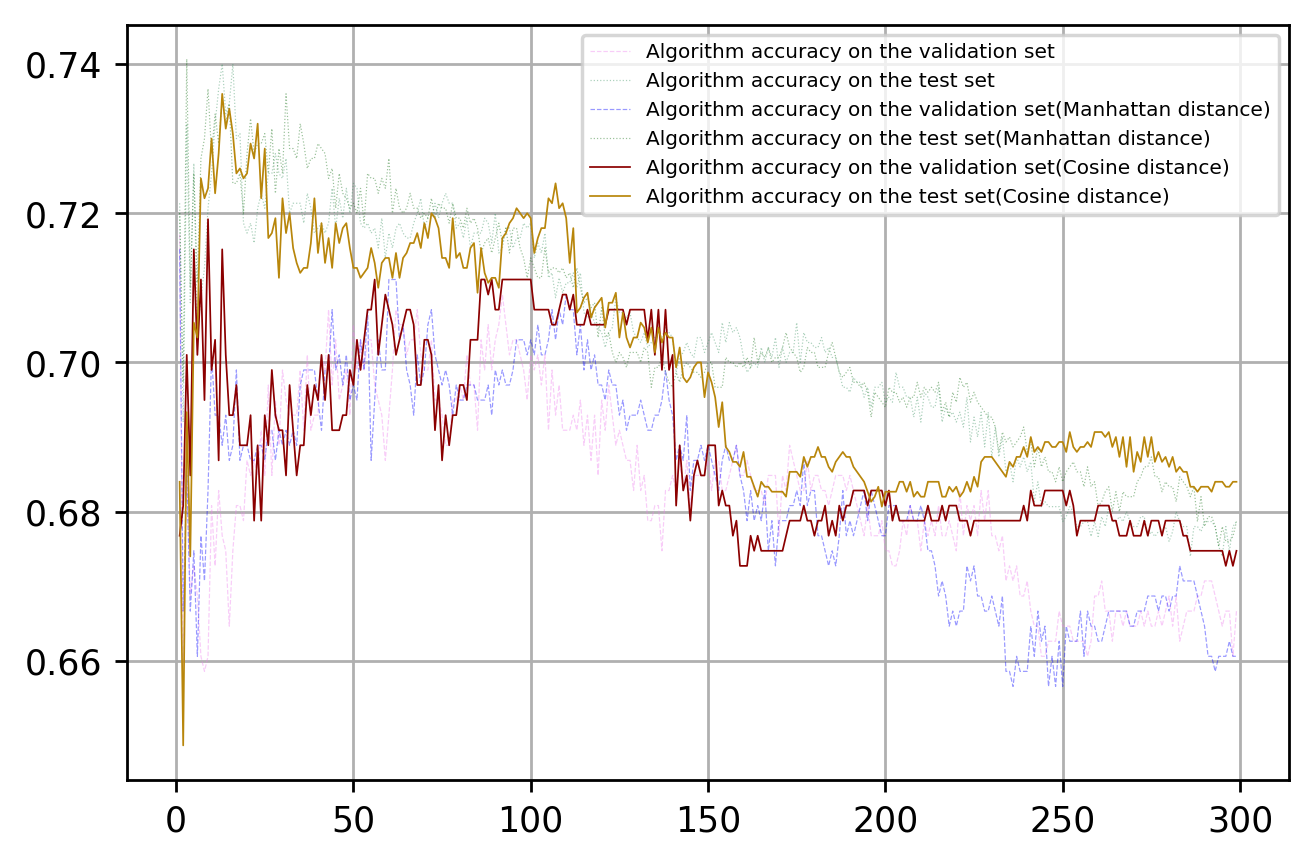

In [27]:
plt.figure(dpi=250)
a=0.4
plt.plot(np.arange(1,300,1),KS,lw=0.35,label='Algorithm accuracy on the validation set',color='violet',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST,lw=0.35,label='Algorithm accuracy on the test set',color='seagreen',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_manhattan,lw=0.35,color='blue',label='Algorithm accuracy on the validation set(Manhattan distance)',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST_M,lw=0.35,label='Algorithm accuracy on the test set(Manhattan distance)',color='darkgreen',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_cosine,lw=0.5,color='darkred',label='Algorithm accuracy on the validation set(Cosine distance)')
plt.plot(np.arange(1,300,1),KSTEST_C,lw=0.5,label='Algorithm accuracy on the test set(Cosine distance)',color='darkgoldenrod')
#plt.plot([1,300],[np.max(KS),np.max(KS)],lw=0.3)
plt.grid()
plt.legend(fontsize='xx-small')
plt.show()

 we can see the accuracy of different hyperparameters on the validation set and the test set on a graph. (according to manhatan distance , euclidean Distance and also cosine distance at the same time)

In [28]:
KS_jaccard=[]
for i in range (1,300):
    knn = KNeighborsClassifier(n_neighbors=i, metric='jaccard')
    knn.fit(X_trian,y_trian)
    KS_jaccard.append(knn.score(X_test,y_test))

We do the same operation with the Jaccard Distance.

In [29]:
np.max(KS_jaccard)

0.5636363636363636

To see the most accuracy we took.

In [30]:
KS_jaccard.index(np.max(KS_jaccard))

0

To see which hyperparameter got the most accuracy.

In [31]:
knn=KNeighborsClassifier(n_neighbors=KS_jaccard.index(np.max(KS_jaccard))+1,metric='jaccard')
knn.fit(X_trian,y_trian)
Jaccard_ac=knn.score(Xtest,zrndtest)
print(Jaccard_ac)

0.5546666666666666


We have already found the optimal hyperparameter for the validation set(Cosine Distance). Now we would like to check the accuracy of this hyperparameter on the test set.

In [32]:
KSTEST_J=[]
for i in range (1,300):
    knn=KNeighborsClassifier(n_neighbors=i,metric='jaccard')
    knn.fit(X_trian,y_trian)
    KSTEST_J.append(knn.score(Xtest,zrndtest))

We only do visualization on the test set as we did before on the validation set.

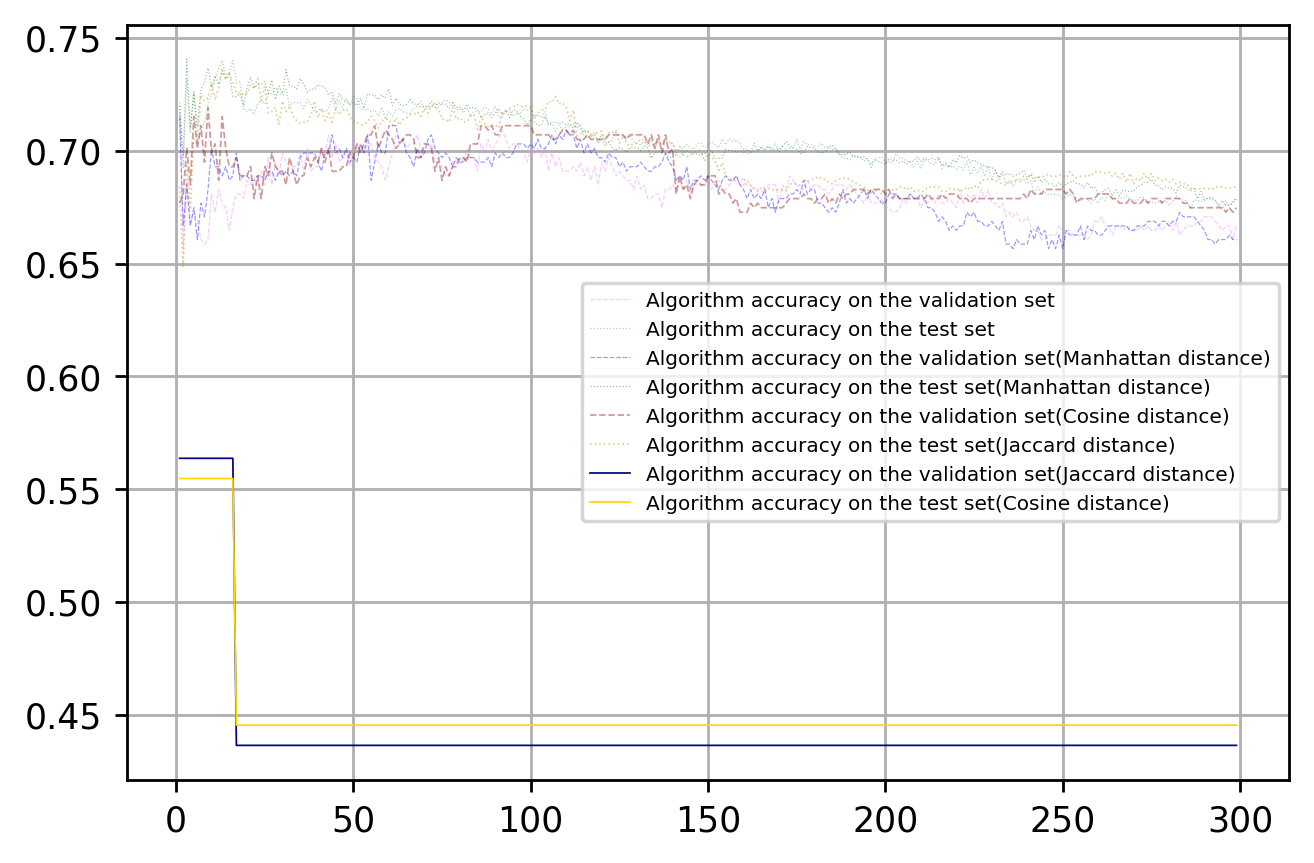

In [33]:
plt.figure(dpi=250)
a=0.4
plt.plot(np.arange(1,300,1),KS,lw=0.35,label='Algorithm accuracy on the validation set',color='violet',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST,lw=0.35,label='Algorithm accuracy on the test set',color='seagreen',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_manhattan,lw=0.35,color='blue',label='Algorithm accuracy on the validation set(Manhattan distance)',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST_M,lw=0.35,label='Algorithm accuracy on the test set(Manhattan distance)',color='darkgreen',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_cosine,lw=0.5,color='darkred',label='Algorithm accuracy on the validation set(Cosine distance)',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST_C,lw=0.5,label='Algorithm accuracy on the test set(Jaccard distance)',color='darkgoldenrod',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_jaccard,lw=0.5,color='navy',label='Algorithm accuracy on the validation set(Jaccard distance)')
plt.plot(np.arange(1,300,1),KSTEST_J,lw=0.5,label='Algorithm accuracy on the test set(Cosine distance)',color='gold')
#plt.plot([1,300],[np.max(KS),np.max(KS)],lw=0.3)
plt.grid()
plt.legend(fontsize='xx-small')
plt.show()

we can see the accuracy of different hyperparameters on the validation set and the test set on a graph. (according to manhatan distance , euclidean Distance, cosine distance and also Jaccard distance at the same time)

In [34]:
KS_hamming=[]
for i in range (1,300):
    knn = KNeighborsClassifier(n_neighbors=i, metric='hamming')
    knn.fit(X_trian,y_trian)
    KS_hamming.append(knn.score(X_test,y_test))

We do the same operation with the Hamming Distance.

In [35]:
np.max(KS_hamming)

0.5636363636363636

To see the most accuracy we took.

In [36]:
KS_hamming.index(np.max(KS_hamming))

0

To see which hyperparameter got the most accuracy.

In [37]:
knn=KNeighborsClassifier(n_neighbors=KS_hamming.index(np.max(KS_hamming))+1,metric='hamming')
knn.fit(X_trian,y_trian)
Hamming_ac=knn.score(Xtest,zrndtest)
print(Hamming_ac)

0.5546666666666666


We have already found the optimal hyperparameter for the validation set(Cosine Distance). Now we would like to check the accuracy of this hyperparameter on the test set.

In [38]:
KSTEST_H=[]
for i in range (1,300):
    knn=KNeighborsClassifier(n_neighbors=i,metric='hamming')
    knn.fit(X_trian,y_trian)
    KSTEST_H.append(knn.score(Xtest,zrndtest))

We only do visualization on the test set as we did before on the validation set.

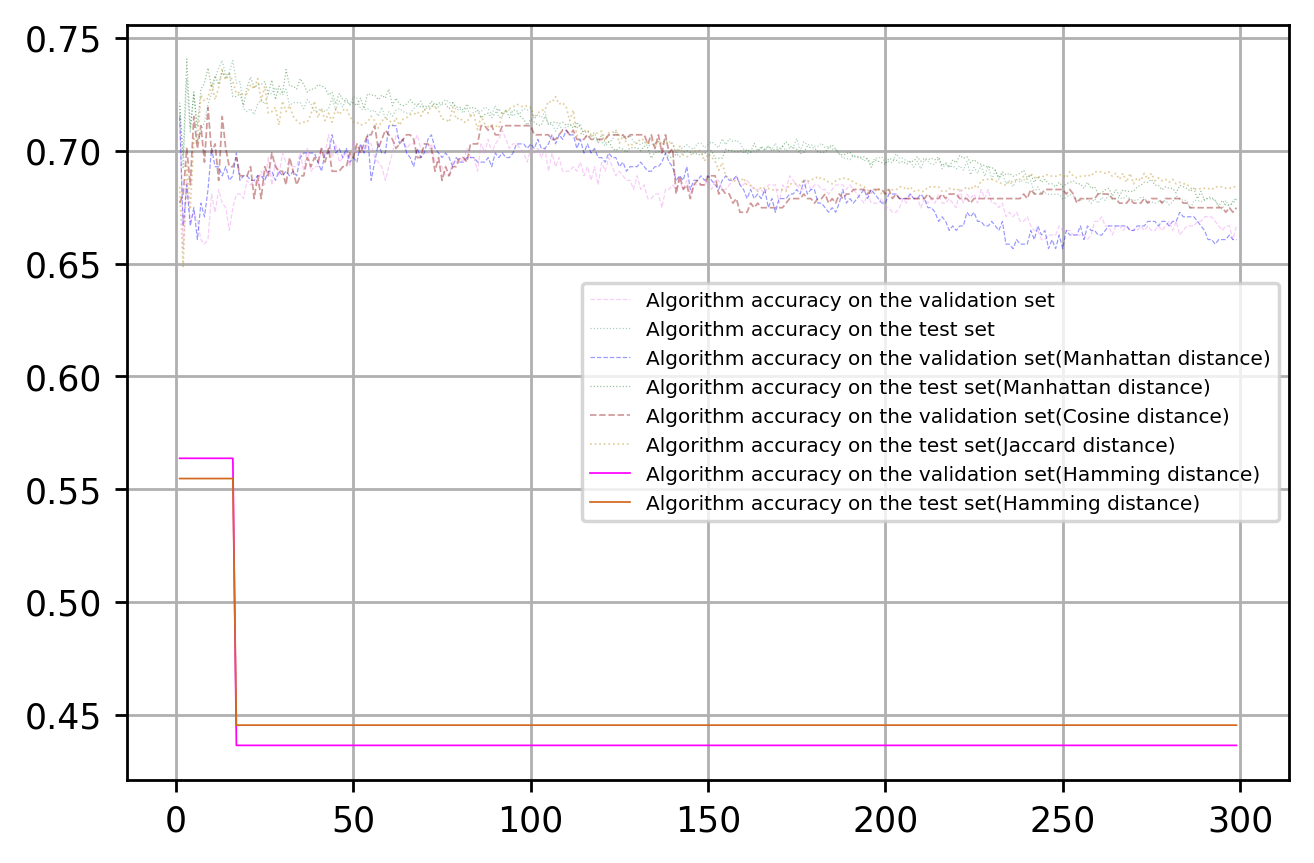

In [39]:
plt.figure(dpi=250)
a=0.4
plt.plot(np.arange(1,300,1),KS,lw=0.35,label='Algorithm accuracy on the validation set',color='violet',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST,lw=0.35,label='Algorithm accuracy on the test set',color='seagreen',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_manhattan,lw=0.35,color='blue',label='Algorithm accuracy on the validation set(Manhattan distance)',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST_M,lw=0.35,label='Algorithm accuracy on the test set(Manhattan distance)',color='darkgreen',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_cosine,lw=0.5,color='darkred',label='Algorithm accuracy on the validation set(Cosine distance)',ls='--',alpha=a)
plt.plot(np.arange(1,300,1),KSTEST_C,lw=0.5,label='Algorithm accuracy on the test set(Jaccard distance)',color='darkgoldenrod',ls=':',alpha=a)
plt.plot(np.arange(1,300,1),KS_hamming,lw=0.5,color='fuchsia',label='Algorithm accuracy on the validation set(Hamming distance)')
plt.plot(np.arange(1,300,1),KSTEST_H,lw=0.5,label='Algorithm accuracy on the test set(Hamming distance)',color='chocolate')
#plt.plot([1,300],[np.max(KS),np.max(KS)],lw=0.3)
plt.grid()
plt.legend(fontsize='xx-small')
plt.show()

we can see the accuracy of different hyperparameters on the validation set and the test set on a graph. (according to manhatan distance , euclidean Distance, cosine distance and also Hamming distance at the same time)

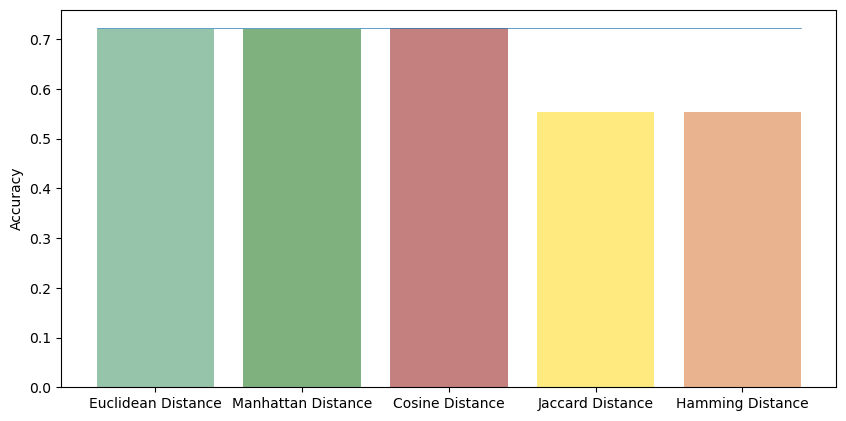

In [40]:
labels = ['Euclidean Distance', 'Manhattan Distance', 'Cosine Distance', 'Jaccard Distance', 'Hamming Distance']
y_pos = np.arange(len(labels))
acc=[Euclidean_ac, Manhattan_ac, Cosine_ac, Jaccard_ac, Hamming_ac]
maximum=np.max(acc)
plt.figure(figsize=(10,5),dpi=100)
plt.plot([-0.4,4.4],[maximum,maximum],lw=0.5)
plt.bar(y_pos, acc, align='center', alpha=0.5,color=['seagreen','darkgreen','darkred','gold','chocolate'])
plt.xticks(y_pos, labels)
plt.ylabel('Accuracy')

plt.show()

You can see the output accuracy of the algorithm based on different meters.